In [37]:
import pandas as pd
import json
from urllib.request import HTTPError
import urllib
import geopandas as gpd
import requests
import matplotlib.pyplot as plt

In [2]:
AIR_QUALITY_API_ENDPOINT = "https://data.cityofnewyork.us/resource/c3uy-2p5r.json"

display(pd.read_json(AIR_QUALITY_API_ENDPOINT).head())

# need to read more than 1000 rows
full_dfs = []
idx = 0
while True:
    partial_df = pd.read_json(f"{AIR_QUALITY_API_ENDPOINT}?$limit=1000&$offset={idx}")
    if not partial_df.empty:
        full_dfs.append(partial_df)
    else:
        break
    idx += 1000

full_df = pd.concat(full_dfs)
full_df

,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value
0,825967,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Summer 2022,2022-06-01T00:00:00.000,12.0
1,823492,365,Fine particles (PM 2.5),Mean,mcg/m3,CD,307,Sunset Park (CD7),Summer 2022,2022-06-01T00:00:00.000,6.7
2,827012,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2022,2022-06-01T00:00:00.000,37.7
3,827081,386,Ozone (O3),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Summer 2022,2022-06-01T00:00:00.000,31.7
4,827103,386,Ozone (O3),Mean,ppb,UHF42,503,Willowbrook,Summer 2022,2022-06-01T00:00:00.000,34.8


,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value
0,825967,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104.0,Pelham - Throgs Neck,Summer 2022,2022-06-01T00:00:00.000,12.0
1,823492,365,Fine particles (PM 2.5),Mean,mcg/m3,CD,307.0,Sunset Park (CD7),Summer 2022,2022-06-01T00:00:00.000,6.7
2,827012,386,Ozone (O3),Mean,ppb,CD,313.0,Coney Island (CD13),Summer 2022,2022-06-01T00:00:00.000,37.7
3,827081,386,Ozone (O3),Mean,ppb,UHF34,103.0,Fordham - Bronx Pk,Summer 2022,2022-06-01T00:00:00.000,31.7
4,827103,386,Ozone (O3),Mean,ppb,UHF42,503.0,Willowbrook,Summer 2022,2022-06-01T00:00:00.000,34.8
...,...,...,...,...,...,...,...,...,...,...,...
20,130373,639,Deaths due to PM2.5,Estimated annual rate (age 30+),"per 100,000 adults",UHF42,301.0,Washington Heights,2005-2007,2005-01-01T00:00:00.000,60.5
21,131328,661,Asthma hospitalizations due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,207.0,East Flatbush - Flatbush,2005-2007,2005-01-01T00:00:00.000,7.2
22,130957,651,Cardiovascular hospitalizations due to PM2.5 (...,Estimated annual rate,"per 100,000 adults",UHF42,309.0,Union Square - Lower East Side,2005-2007,2005-01-01T00:00:00.000,25.1
23,130737,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,Âµg/m3,UHF42,105.0,Crotona -Tremont,2005,2005-01-01T00:00:00.000,3.4


In [44]:
full_df["geo_type_name"].unique()

array(['UHF34', 'CD', 'UHF42', 'Borough', 'Citywide'], dtype=object)

In [58]:
full_df[full_df["geo_type_name"] == "Citywide"]

,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value
64,825852,375,Nitrogen dioxide (NO2),Mean,ppb,Citywide,1.0,New York City,Summer 2022,2022-06-01T00:00:00.000,10.6
263,823352,365,Fine particles (PM 2.5),Mean,mcg/m3,Citywide,1.0,New York City,Summer 2022,2022-06-01T00:00:00.000,6.4
267,827049,386,Ozone (O3),Mean,ppb,Citywide,1.0,New York City,Summer 2022,2022-06-01T00:00:00.000,34.1
614,823351,365,Fine particles (PM 2.5),Mean,mcg/m3,Citywide,1.0,New York City,Annual Average 2022,2022-01-01T00:00:00.000,5.8
704,825851,375,Nitrogen dioxide (NO2),Mean,ppb,Citywide,1.0,New York City,Annual Average 2022,2022-01-01T00:00:00.000,14.7
...,...,...,...,...,...,...,...,...,...,...,...
758,131069,653,Asthma emergency departments visits due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",Citywide,1.0,New York City,2005-2007,2005-01-01T00:00:00.000,91.3
759,130829,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",Citywide,1.0,New York City,2005-2007,2005-01-01T00:00:00.000,126.3
766,130727,646,Outdoor Air Toxics - Benzene,Annual average concentration,Âµg/m3,Citywide,1.0,New York City,2005,2005-01-01T00:00:00.000,2.9
771,130775,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,Âµg/m3,Citywide,1.0,New York City,2005,2005-01-01T00:00:00.000,3.2


In [46]:
gpd.read_file("https://github.com/nychealth/EHDP-data/raw/production/geography/modzcta/geo_export_6b971eb4-72c5-43ee-bd73-9b28bdad7733.shp")

,modzcta,label,zcta,pop_est,geometry
0,10001,"10001, 10118","10001, 10119, 10199",23072.0,"POLYGON ((-73.98774 40.74407, -73.98819 40.743..."
1,10002,10002,10002,74993.0,"POLYGON ((-73.99750 40.71407, -73.99709 40.714..."
2,10003,10003,10003,54682.0,"POLYGON ((-73.98864 40.72293, -73.98876 40.722..."
3,10026,10026,10026,39363.0,"MULTIPOLYGON (((-73.96201 40.80551, -73.96007 ..."
4,10004,10004,10004,3028.0,"MULTIPOLYGON (((-74.00827 40.70772, -74.00937 ..."
...,...,...,...,...,...
173,11434,11434,"11430, 11434",65989.0,"POLYGON ((-73.75461 40.64720, -73.75380 40.646..."
174,11435,11435,11435,59296.0,"POLYGON ((-73.80577 40.68293, -73.80606 40.683..."
175,11694,11694,11694,21354.0,"POLYGON ((-73.86496 40.56663, -73.86558 40.567..."
176,11697,11697,11697,3540.0,"POLYGON ((-73.86289 40.57606, -73.86281 40.575..."


In [47]:
gpd.read_file("https://github.com/nychealth/EHDP-data/raw/production/geography/nybb_22c/nybb.shp")

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,325917.353702,1.623621e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,2,Bronx,463176.004334,1.187182e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."
2,3,Brooklyn,728263.543413,1.934229e+09,"MULTIPOLYGON (((1022227.320 152028.146, 102207..."
3,1,Manhattan,357564.317228,6.365208e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,4,Queens,888199.780587,3.041419e+09,"MULTIPOLYGON (((1032452.015 154469.237, 103245..."


In [48]:
gpd.read_file("https://github.com/nychealth/EHDP-data/raw/production/geography/nycd_22c/nycd.shp")

,BoroCD,Shape_Leng,Shape_Area,geometry
0,404,37018.373862,6.573966e+07,"POLYGON ((1026508.290 208553.862, 1026368.569 ..."
1,304,37007.806528,5.666261e+07,"POLYGON ((1012965.523 187886.949, 1012949.003 ..."
2,303,36213.671066,7.946150e+07,"POLYGON ((1006978.609 189657.381, 1006991.773 ..."
3,308,38232.887088,4.560379e+07,"POLYGON ((995818.280 186959.985, 996465.612 18..."
4,112,54703.224746,7.796454e+07,"POLYGON ((1002388.021 243854.511, 1002337.443 ..."
...,...,...,...,...
66,108,53753.353651,5.521503e+07,"MULTIPOLYGON (((1000370.939 219466.661, 100015..."
67,401,91164.880475,1.714928e+08,"MULTIPOLYGON (((1010148.119 227175.052, 101124..."
68,480,47338.740527,3.277756e+07,"POLYGON ((1022276.970 218625.343, 1022251.388 ..."
69,110,35869.982701,3.908631e+07,"POLYGON ((1002388.021 243854.511, 1002383.991 ..."


In [49]:
gpd.read_file("https://github.com/nychealth/EHDP-data/raw/production/geography/nycdta2020_22c/nycdta2020.shp")

,BoroCode,BoroName,CountyFIPS,CDTA2020,CDTAName,CDTAType,Shape_Leng,Shape_Area,geometry
0,3,Brooklyn,047,BK01,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),0,65656.814922,1.316587e+08,"POLYGON ((1005302.497 199455.730, 1005307.792 ..."
1,3,Brooklyn,047,BK02,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,0,65236.060081,7.592282e+07,"POLYGON ((992763.566 196891.144, 992808.718 19..."
2,3,Brooklyn,047,BK03,BK03 Bedford-Stuyvesant (CD 3 Approximation),0,37550.853201,7.819622e+07,"POLYGON ((1006978.609 189657.381, 1006991.773 ..."
3,3,Brooklyn,047,BK04,BK04 Bushwick (CD 4 Equivalent),0,36981.722589,5.665339e+07,"POLYGON ((1012948.800 187911.295, 1012925.950 ..."
4,3,Brooklyn,047,BK05,BK05 East New York-Cypress Hills (CD 5 Approxi...,0,78801.888340,1.654563e+08,"MULTIPOLYGON (((1015251.087 174914.561, 101524..."
...,...,...,...,...,...,...,...,...,...
66,4,Queens,081,QN84,QN84 Jamaica Bay (East) (JIA 84 Approximation),1,214324.923185,1.225797e+08,"MULTIPOLYGON (((1022139.523 148365.158, 102189..."
67,5,Staten Island,085,SI01,SI01 North Shore (CD 1 Equivalent),0,153717.286370,3.772842e+08,"MULTIPOLYGON (((939997.095 173013.579, 939915...."
68,5,Staten Island,085,SI02,SI02 Mid-Island (CD 2 Approximation),0,145692.495937,6.061720e+08,"POLYGON ((966483.927 158660.167, 966723.386 15..."
69,5,Staten Island,085,SI03,SI03 South Shore (CD 3 Approximation),0,179416.598992,5.954192e+08,"POLYGON ((956436.726 142934.189, 956404.246 14..."


,UHFCODE,UHFNAME,BOROUGH,UHF,ALTCHPUHF,CHSUHF,SHAPE_Leng,SHAPE_Area,geometry
0,101.0,Kingsbridge - Riverdale,Bronx,101.0,Kingsbridge and Riverdale,101 Kingsbridge,57699.155405,1.332914e+08,"POLYGON ((1017992.894 269222.964, 1017812.000 ..."
1,102.0,Northeast Bronx,Bronx,102.0,the Northeast Bronx,102 Northeast Bronx,88219.321955,1.813708e+08,"POLYGON ((1025012.990 270794.260, 1025061.481 ..."
2,103.0,Fordham - Bronx Park,Bronx,103.0,Fordham and Bronx Park,103 Fordham - Bronx Pk,59711.872129,1.407724e+08,"POLYGON ((1023994.479 261065.967, 1023885.806 ..."
3,104.0,Pelham - Throgs Neck,Bronx,104.0,the Southeast Bronx,104 Pelham,250903.368668,3.865737e+08,"MULTIPOLYGON (((1035076.590 252950.826, 103518..."
4,105.0,Crotona - Tremont,Bronx,105.0,the Central Bronx,105 Crotona-Tremont,66676.088852,1.068978e+08,"POLYGON ((1007916.255 252530.752, 1008237.865 ..."


,UHF34_CODE,BOROUGH,UHF_NAME,SHAPE_Leng,SHAPE_Area,geometry
0,0,Man,None,207801.970255,2.772002e+08,"MULTIPOLYGON (((1033048.157 181084.379, 103304..."
1,101,Bronx,Kingsbridge - Riverdale,57778.549601,1.333196e+08,"POLYGON ((1017992.894 269222.964, 1017812.000 ..."
2,102,Bronx,Northeast Bronx,89204.538561,1.813665e+08,"POLYGON ((1025012.990 270794.260, 1025061.481 ..."
3,103,Bronx,Fordham - Bronx Park,59666.697852,1.411197e+08,"POLYGON ((1023994.480 261065.967, 1023885.806 ..."
4,104,Bronx,Pelham - Throgs Neck,251210.433712,3.865765e+08,"MULTIPOLYGON (((1035076.590 252950.826, 103518..."


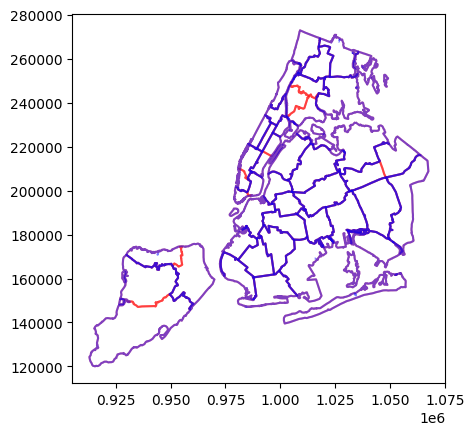

In [45]:
geometries_uhf_42 = gpd.read_file("https://raw.githubusercontent.com/nychealth/EHDP-data/production/geography/UHF%2042/UHF_42_DOHMH.shp")
geometries_uhf_34 = gpd.read_file("https://raw.githubusercontent.com/nychealth/EHDP-data/production/geography/UHF%2034/UHF_34_DOHMH.shp")

display(geometries_uhf_42.head())
display(geometries_uhf_34.head())

fig, ax = plt.subplots()
geometries_uhf_42.boundary.plot(alpha=0.5, color="red", ax=ax)
geometries_uhf_34.boundary.plot(alpha=0.5, color="blue", ax=ax)
plt.show()

In [52]:
geometries_cd = gpd.read_file("https://github.com/nychealth/EHDP-data/raw/production/geography/nycd_22c/nycd.shp")
geometries_cd

,BoroCD,Shape_Leng,Shape_Area,geometry
0,404,37018.373862,6.573966e+07,"POLYGON ((1026508.290 208553.862, 1026368.569 ..."
1,304,37007.806528,5.666261e+07,"POLYGON ((1012965.523 187886.949, 1012949.003 ..."
2,303,36213.671066,7.946150e+07,"POLYGON ((1006978.609 189657.381, 1006991.773 ..."
3,308,38232.887088,4.560379e+07,"POLYGON ((995818.280 186959.985, 996465.612 18..."
4,112,54703.224746,7.796454e+07,"POLYGON ((1002388.021 243854.511, 1002337.443 ..."
...,...,...,...,...
66,108,53753.353651,5.521503e+07,"MULTIPOLYGON (((1000370.939 219466.661, 100015..."
67,401,91164.880475,1.714928e+08,"MULTIPOLYGON (((1010148.119 227175.052, 101124..."
68,480,47338.740527,3.277756e+07,"POLYGON ((1022276.970 218625.343, 1022251.388 ..."
69,110,35869.982701,3.908631e+07,"POLYGON ((1002388.021 243854.511, 1002383.991 ..."


In [53]:
# get all geometries together
# need a single dataframe with geo_type_name, geo_join_id, and geometry so we can get a geometry column assigned to the air quality dataset
full_gdf = gpd.GeoDataFrame(pd.concat(
    [
        geometries_uhf_34[["UHF34_CODE", "geometry"]].assign(geo_type_name="UHF34").rename(columns={"UHF34_CODE": "geo_join_id"}),
        geometries_uhf_42[["UHFCODE", "geometry"]].assign(geo_type_name="UHF42").rename(columns={"UHFCODE": "geo_join_id"}),
        geometries_cd[["BoroCD", "geometry"]].assign(geo_type_name="CD").rename(columns={"BoroCD": "geo_join_id"})
    ]
))
full_gdf

,geo_join_id,geometry,geo_type_name
0,0.0,"MULTIPOLYGON (((1033048.157 181084.379, 103304...",UHF34
1,101.0,"POLYGON ((1017992.894 269222.964, 1017812.000 ...",UHF34
2,102.0,"POLYGON ((1025012.990 270794.260, 1025061.481 ...",UHF34
3,103.0,"POLYGON ((1023994.480 261065.967, 1023885.806 ...",UHF34
4,104.0,"MULTIPOLYGON (((1035076.590 252950.826, 103518...",UHF34
...,...,...,...
66,108.0,"MULTIPOLYGON (((1000370.939 219466.661, 100015...",CD
67,401.0,"MULTIPOLYGON (((1010148.119 227175.052, 101124...",CD
68,480.0,"POLYGON ((1022276.970 218625.343, 1022251.388 ...",CD
69,110.0,"POLYGON ((1002388.021 243854.511, 1002383.991 ...",CD


In [ ]:
# loading ACS data



In [20]:
# take a look at the raw data
display(full_df.head())
display(full_df.tail())
display(full_df.describe())
display(full_df.info())

,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value
0,825967,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104.0,Pelham - Throgs Neck,Summer 2022,2022-06-01T00:00:00.000,12.0
1,823492,365,Fine particles (PM 2.5),Mean,mcg/m3,CD,307.0,Sunset Park (CD7),Summer 2022,2022-06-01T00:00:00.000,6.7
2,827012,386,Ozone (O3),Mean,ppb,CD,313.0,Coney Island (CD13),Summer 2022,2022-06-01T00:00:00.000,37.7
3,827081,386,Ozone (O3),Mean,ppb,UHF34,103.0,Fordham - Bronx Pk,Summer 2022,2022-06-01T00:00:00.000,31.7
4,827103,386,Ozone (O3),Mean,ppb,UHF42,503.0,Willowbrook,Summer 2022,2022-06-01T00:00:00.000,34.8


,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value
20,130373,639,Deaths due to PM2.5,Estimated annual rate (age 30+),"per 100,000 adults",UHF42,301.0,Washington Heights,2005-2007,2005-01-01T00:00:00.000,60.5
21,131328,661,Asthma hospitalizations due to Ozone,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,207.0,East Flatbush - Flatbush,2005-2007,2005-01-01T00:00:00.000,7.2
22,130957,651,Cardiovascular hospitalizations due to PM2.5 (...,Estimated annual rate,"per 100,000 adults",UHF42,309.0,Union Square - Lower East Side,2005-2007,2005-01-01T00:00:00.000,25.1
23,130737,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,Âµg/m3,UHF42,105.0,Crotona -Tremont,2005,2005-01-01T00:00:00.000,3.4
24,130997,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",UHF42,301.0,Washington Heights,2005-2007,2005-01-01T00:00:00.000,3.1


,unique_id,indicator_id,geo_join_id,data_value
count,18025.000000,18025.000000,1.801600e+04,18025.000000
mean,426268.515784,434.675895,5.849819e+05,21.327950
std,250349.383768,115.758989,7.730418e+06,23.844455
min,121644.000000,365.000000,1.000000e+00,0.000000
25%,175303.000000,365.000000,2.020000e+02,8.900000
50%,410807.000000,375.000000,3.030000e+02,15.100000
75%,649881.000000,386.000000,4.040000e+02,26.700000
max,828353.000000,661.000000,1.051061e+08,424.700000


<class 'pandas.core.frame.DataFrame'>
Index: 18025 entries, 0 to 24
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unique_id       18025 non-null  int64  
 1   indicator_id    18025 non-null  int64  
 2   name            18025 non-null  object 
 3   measure         18025 non-null  object 
 4   measure_info    18025 non-null  object 
 5   geo_type_name   18025 non-null  object 
 6   geo_join_id     18016 non-null  float64
 7   geo_place_name  18016 non-null  object 
 8   time_period     18025 non-null  object 
 9   start_date      18025 non-null  object 
 10  data_value      18025 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.7+ MB


None

In [21]:
full_df[pd.isna(full_df["geo_join_id"])]

,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value
72,828009,655,Asthma hospitalizations due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",Borough,NaN,NaN,2017-2019,2017-01-01T00:00:00.000,10.0
73,828010,655,Asthma hospitalizations due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",Borough,NaN,NaN,2017-2019,2017-01-01T00:00:00.000,14.0
90,827818,653,Asthma emergency departments visits due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",Borough,NaN,NaN,2017-2019,2017-01-01T00:00:00.000,60.0
94,827821,653,Asthma emergency departments visits due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",Borough,NaN,NaN,2017-2019,2017-01-01T00:00:00.000,145.0
95,827819,653,Asthma emergency departments visits due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",Borough,NaN,NaN,2017-2019,2017-01-01T00:00:00.000,74.0
99,828011,655,Asthma hospitalizations due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",Borough,NaN,NaN,2017-2019,2017-01-01T00:00:00.000,15.0
100,827817,653,Asthma emergency departments visits due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",Borough,NaN,NaN,2017-2019,2017-01-01T00:00:00.000,43.0
102,827820,653,Asthma emergency departments visits due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",Borough,NaN,NaN,2017-2019,2017-01-01T00:00:00.000,92.0
110,828012,655,Asthma hospitalizations due to Ozone,Estimated annual rate (under age 18),"per 100,000 children",Borough,NaN,NaN,2017-2019,2017-01-01T00:00:00.000,27.0


In [22]:
full_df["name"].unique()

array(['Nitrogen dioxide (NO2)', 'Fine particles (PM 2.5)', 'Ozone (O3)',
       'Annual vehicle miles traveled',
       'Annual vehicle miles traveled (trucks)',
       'Annual vehicle miles traveled (cars)',
       'Asthma emergency departments visits due to Ozone',
       'Asthma hospitalizations due to Ozone',
       'Cardiac and respiratory deaths due to Ozone',
       'Deaths due to PM2.5',
       'Respiratory hospitalizations due to PM2.5 (age 20+)',
       'Cardiovascular hospitalizations due to PM2.5 (age 40+)',
       'Asthma emergency department visits due to PM2.5',
       'Boiler Emissions- Total PM2.5 Emissions',
       'Boiler Emissions- Total SO2 Emissions',
       'Boiler Emissions- Total NOx Emissions',
       'Outdoor Air Toxics - Formaldehyde',
       'Outdoor Air Toxics - Benzene'], dtype=object)

In [31]:
# just take the rows pertaining to the amount of particulate matter in the air
particle_names = ['Nitrogen dioxide (NO2)', 'Fine particles (PM 2.5)', 'Ozone (O3)']
particle_df = full_df[full_df["name"].isin(particle_names)]
display(particle_df.head())
print(particle_df.shape)
display(particle_df[["name", "measure", "measure_info"]].drop_duplicates())


,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value
0,825967,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104.0,Pelham - Throgs Neck,Summer 2022,2022-06-01T00:00:00.000,12.0
1,823492,365,Fine particles (PM 2.5),Mean,mcg/m3,CD,307.0,Sunset Park (CD7),Summer 2022,2022-06-01T00:00:00.000,6.7
2,827012,386,Ozone (O3),Mean,ppb,CD,313.0,Coney Island (CD13),Summer 2022,2022-06-01T00:00:00.000,37.7
3,827081,386,Ozone (O3),Mean,ppb,UHF34,103.0,Fordham - Bronx Pk,Summer 2022,2022-06-01T00:00:00.000,31.7
4,827103,386,Ozone (O3),Mean,ppb,UHF42,503.0,Willowbrook,Summer 2022,2022-06-01T00:00:00.000,34.8


(13968, 11)


,name,measure,measure_info
0,Nitrogen dioxide (NO2),Mean,ppb
1,Fine particles (PM 2.5),Mean,mcg/m3
2,Ozone (O3),Mean,ppb


In [ ]:
particle_names